# Part 5

In [1]:
import numpy as np
np.random.seed(1)
import optilibrary as ot

X_train, y_train, X_test, y_test, cols = ot.importData(p=0.2)
n, d = X_train.shape


## Question 1: 
_Add an l2 regularisation term to your objective function from Part 1 or Part 3. Compare the solution of the unregularized problem to those obtained while solving the problem with_ 
- _a small value for the regularisation parameter and_ 
- _a large value for the regularisation parameter_

### $\ell_2$-norm - Ridge
As in Part 1, the function to be minimised may be written as
$$
    \min_{\mathbf{x} \in \mathbb{R}^d} f_{\ell_2}(\mathbf{x}) = \frac{1}{2n} \|\mathbf{A} \mathbf{x} - \mathbf{y}\|^2 + \frac{\lambda}{2} \|x\|^2_2,
$$
where $\lambda>0$

In [2]:
import matplotlib.pyplot as plt

We run several iterations for varying values of $\lambda$

Lambda 	Norm of solution
0 	2.1098
0.05 	2.0342
0.5 	1.4663
1 	1.0233
5 	0.1301
10 	0.0654
100 	0.0071


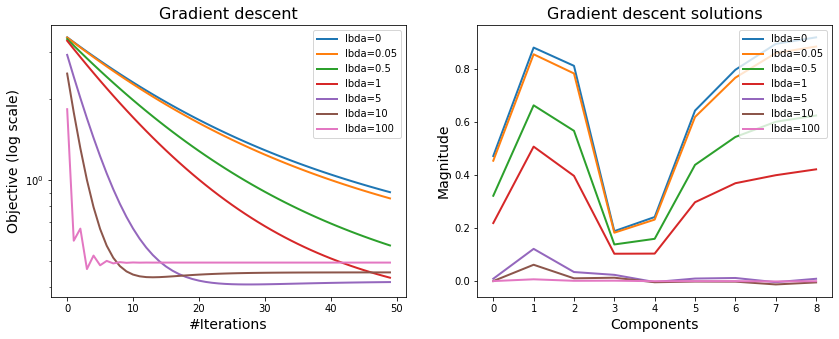

In [14]:
# Testing l2 regularisation
lvals = [0, 0.05, 0.5, 1, 5, 10, 100] #GD, small, big
nlbda = len(lvals)
x0 = np.ones(d)
n_iter =50
Xsol = np.zeros((d,nlbda))
step = 0.015

plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
print("Lambda \tNorm of solution")
for i in range(nlbda):
    lbda =lvals[i]
    # Xsol[:,i], obj_gd, _,_ = gd_l2(x0,pblinreg,lbda,x_min_lin,stepchoice=0,step0=1, n_iter=n_iter)
    Xsol[:,i], obj_gd = ot.GD_ridge(X_train, y_train, n_iter, step=step, lmbd=lbda)
    print(f"{lbda} \t{np.round(np.linalg.norm(Xsol[:,i]), 4)}")
    plt.semilogy(obj_gd, label="lbda="+str(lbda), lw=2)
plt.title("Gradient descent", fontsize=16)
plt.xlabel("#Iterations", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend(loc=1)

plt.subplot(1,2,2)
for i in range(nlbda):
    plt.plot(Xsol[:,i],label="lbda="+str(lvals[i]), lw=2)
plt.title("Gradient descent solutions", fontsize=16)
plt.xlabel("Components", fontsize=14)
plt.ylabel("Magnitude", fontsize=14)
plt.legend(loc=1);

As discussed before, the addition of an $\ell_2$-regularisation term enforces strong convexity and thus ensures that the problem has a unique global solution. We observe above the impact that $\lambda$ has on the problem. As $\lambda \rightarrow \infty$, the regularisation term reduces the dependency of the solution to the data as it increasingly dominates the eqauation by its magnitude and thus also the variance with respect to the data.

We observe also the effect discussed in class that the introduction of $\ell_2$ regularisation enforces a constraint on the $\ell_2$ norm of the solution and thus drives the solution to have increasingly smaller values in termps of the $\ell_2$-norm.

In other words, the addition of an $\ell_2$-norm smoothes out the solution and leads to values of the solution vector that have increasingly smaller norms. We may once again observe the figure on the right above to see that the solution components shrink in a rather uniform (i.e. smooth) fashion.

## Question 2 : 
_Add a l-1 regularisation term to your objective function from Part 1 or Part 3 and solve the resulting problem. Can you find a value of the regularisation parameter that yields a sparse solution? Does it provide a good value for the data-fitting term?_

### $\ell_1$-norm - Lasso

We now add an $\ell_1$ regularisation term to the data and consider the new problem
$$
    \min_{{x} \in \mathbb{R}^d} f_{\ell_1}({x}) = \frac{1}{2n} \|{A} {x} - {y}\|^2 + \frac{\lambda}{2} \|x\|_1,
$$
The gradient of the regularisation term does not exist and so a typical solution is obtained by means of the ISTA-algorithm.
The usual gradient descent step for the smooth part of the objective is given by:
$$
    {g}_k = {x}_k - \alpha_k \frac{1}{n}A^T(Ax-y).
$$
For an iterate ${x}_k$ and a stepsize $\alpha_k>0$, each update to an iterate will be:
$$
x_{k+1} = \text{prox}_{\lambda\alpha_k}\left( x_k - \alpha_k g_k \right)
$$
where the proximal form is computed by making use of the (coordinate-wise) soft-thresholding formula:
$$
    \forall i=1,\dots,d, \quad [{x}_{k+1}]_i \; = \; 
    \left\{
        \begin{array}{ll}
            [{g}_k]_i + \lambda \alpha_k &\mathrm{if } [{g}_k]_i < -\lambda \alpha_k \\
            [{g}_k]_i - \lambda \alpha_k &\mathrm{if } []_i > \lambda \alpha_k \\
            0 &\mathrm{otherwise.}
        \end{array}
    \right.
$$

We consider the behavior of ISTA for several values of the regularisation parameter $\lambda$, namely:
$$
   \lambda \in \left\{0, \frac{1}{100}, \frac{1}{10}, \frac{1}{5}, \frac{1}{2}\right\}.
$$

lbda 	 #non-zero
0: 		9
0.1: 		9
0.5: 		7
0.75: 		5
0.9: 		3
2: 		0


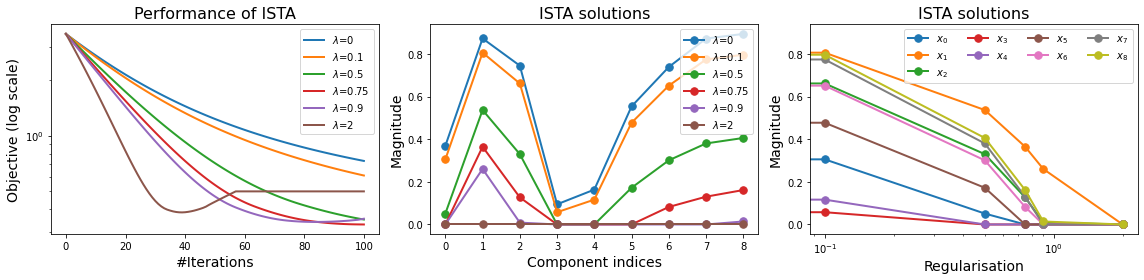

In [22]:
# Testing l1 regularisation
penalties = [0, 0.1, 0.5, 0.75, 0.9, 2]
nlbda = len(penalties)
x0 = np.ones(d)
n_iter = 100
Xsol = np.ones((d,nlbda))
train_loss = np.zeros(len(penalties))

plt.figure(figsize=(16, 4), tight_layout=True)

print("lbda \t #non-zero")
plt.subplot(1,3,1)
for i in range(nlbda):
    lbda =penalties[i]
    # Xsol[:,i], obj_is = ista(x0,pblinreg,lbda,stepchoice=0,step0=1, n_iter=n_iter)
    Xsol[:,i], obj_is = ot.ISTA(X_train, y_train, lbda, step=0.01, niter=n_iter)
    print(str(lbda)+": \t\t"+str(np.count_nonzero(Xsol[:,i])))
    plt.semilogy(obj_is, label=r"$\lambda$="+str(lbda), lw=2)
    train_loss[i] = obj_is[-1]
    
plt.title("Performance of ISTA", fontsize=16)
plt.xlabel("#Iterations", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend(loc=1)

plt.subplot(1,3,2)
for i in range(nlbda):
    plt.plot(Xsol[:,i],'.-', markersize=15, label=r"$\lambda$="+str(penalties[i]), lw=2)
plt.title("ISTA solutions", fontsize=16)
plt.xlabel("Component indices", fontsize=14)
plt.ylabel("Magnitude", fontsize=14)
plt.legend(loc=1)

plt.subplot(1,3,3)
for i in range(d):
    plt.plot(penalties, Xsol[i,:],'.-', markersize=15, label=rf"$x_{str(i)}$", lw=2)
plt.title("ISTA solutions", fontsize=16)
plt.xticks(penalties)
plt.xscale('log')
plt.xlabel("Regularisation", fontsize=14)
plt.ylabel("Magnitude", fontsize=14)
plt.legend(ncol=4,loc=1);

$\ell_1$ regularisation does indeed lead to sparser solutions. Indeed, we observe that increasing regularisation parameter $\lambda$ leads to a decrease in the number of non-zero components; and only the largest components remain. (See the middle graph above where component indices #3 and #4 are set to 0 'first', before indices such as #1 and #8 are)

For a regularisation parameter which is large enough, all components end up being set to 0 as the regularisation term dominates the expression to be minimised and hence having all components equal to zero is more beneficial than truly minimising the objective. 

This is not always beneficial, as may be seen from the left-most figure above. Vectors which still have non-zero components provide better solutions than their all-zero counterparts.

In [25]:
penalties = np.linspace(start=0.2, stop=1.2, num=100)
n_iter = 100
step = 0.01
Xsol = np.zeros((d,len(penalties)))
train_loss = np.zeros(len(penalties))
# test_loss = np.zeros(len(penalties))
sparsity = np.zeros(len(penalties))

for i in range(len(penalties)):
    lbda =penalties[i]
    Xsol[:,i], obj_is = ot.ISTA(X_train, y_train, lbda, step, n_iter)
    train_loss[i] = obj_is[-1]
    # test_loss[i] = GD_loss(X_test, Xsol[:,i], y_test)
    sparsity[i] = np.count_nonzero(Xsol[:,i]) / len(Xsol)


Consider now a series of runs where the value of $\lambda$ is varied on the interval $[0.2, 1.2]$. We find the best value on the data set and see that it is indeed attained with not all components being set to 0.

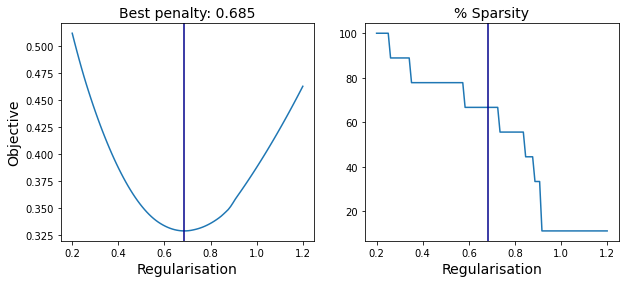

In [26]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(penalties, train_loss, label='Training Loss')
min_i = np.argmin(train_loss)

plt.axvline(penalties[min_i], c='darkblue')
plt.title(f'Best penalty: {np.round(penalties[min_i], 3)}', fontsize=14)
plt.xlabel("Regularisation", fontsize=14)
plt.ylabel("Objective", fontsize=14)

plt.subplot(1,2,2)
plt.plot(penalties, sparsity*100)
plt.axvline(penalties[min_i], c='darkblue')
plt.xlabel("Regularisation", fontsize=14)
plt.title('% Sparsity', fontsize=14);


In [27]:
print(f"Number of non-zero components at optimal: \n{np.count_nonzero(Xsol[:,min_i])}")

Number of non-zero components at optimal: 
6


This implies that considering only a subset of the features will be sufficient. Specifically,

In [55]:
print("Features retained: \n", [cols[i] for i in list((np.where(Xsol[:,min_i]))[0])])
print("Features removed \n", [cols[i] for i in list((np.where(Xsol[:,min_i]==0))[0])] )

Features retained: 
 ['HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude', 'Intercept']
Features removed 
 ['MedInc', 'AveBedrms', 'Population']


Let us now use this to consider prediction performance

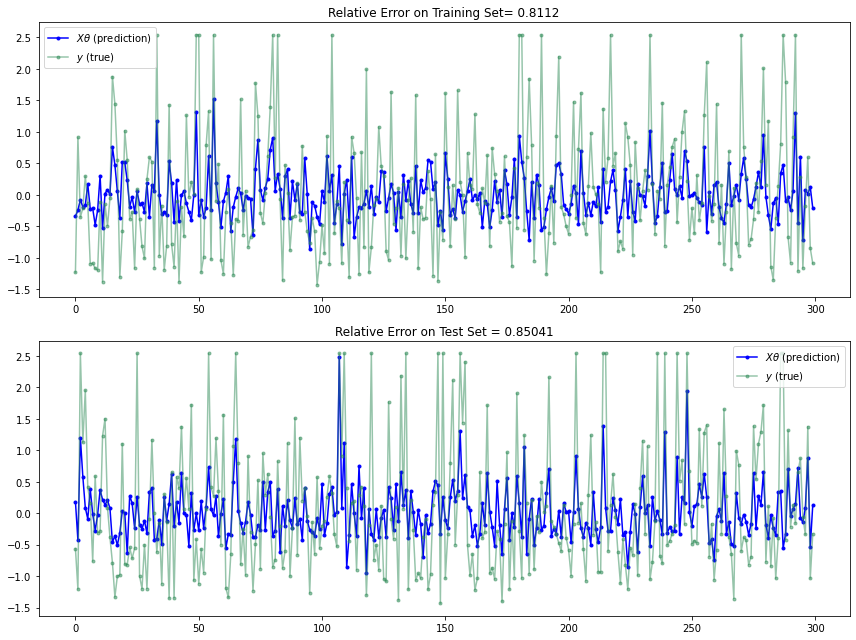

In [58]:
thstar = Xsol[:,min_i]

numpredictions=300

plt.clf
plt.figure(figsize= (12,9), tight_layout=True)
plt.subplot(2, 1, 1)
plt.plot( X_train.dot(thstar)[0:numpredictions], 'b.-')
plt.plot( y_train[0:numpredictions], '.-', c='seagreen', alpha=0.5)
rel_err = np.linalg.norm(X_train.dot(thstar) - y_train, 2) / np.linalg.norm(y_train, 2)
plt.title(f'Relative Error on Training Set= {np.round(rel_err, 4)}')
plt.legend((r'$X\theta$ (prediction)', r'$y$ (true)'))

plt.subplot(2, 1, 2)
plt.plot( X_test.dot(thstar)[0:numpredictions], 'b.-')
plt.plot( y_test[0:numpredictions], '.-', c='seagreen', alpha=0.5)
rel_err = np.linalg.norm(X_test.dot(thstar) - y_test, 2) / np.linalg.norm(y_test, 2)
plt.title(f'Relative Error on Test Set = {np.round(rel_err, 5)}')
plt.legend((r'$X\theta$ (prediction)', r'$y$ (true)'));

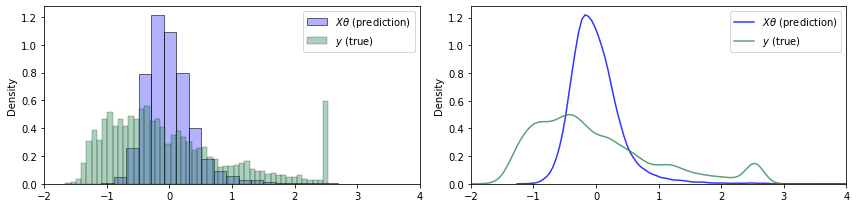

In [70]:
import seaborn as sns
plt.figure(figsize= (12,3), tight_layout=True)
plt.subplot(1,2,1)
sns.histplot(x=X_train.dot(thstar), kde=False, stat='density', bins=50, color='b', alpha=0.3)
sns.histplot(x=y_train, kde=False, stat='density', bins=50, color='seagreen', alpha=0.4);
plt.xlim(-2, 4)
# plt.ylim(0, )
plt.legend((r'$X\theta$ (prediction)', r'$y$ (true)'));

plt.subplot(1,2,2)
sns.kdeplot(x=X_train.dot(thstar), color='b', alpha=0.8)
sns.kdeplot(x=y_train, color='seagreen', alpha=0.8)
plt.xlim(-2, 4)
# plt.ylim(0, 0.9)
plt.legend((r'$X\theta$ (prediction)', r'$y$ (true)'));